In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-08-26 / Aki Taanila


# Asiakaspalvelupisteen simulointi

Asiakaspalvelupisteen jonon muodostukseen vaikuttaa kaksi tekijää:

- Asiakkaiden saapuminen palvelupisteeseen.
- Palvelun kesto.

Asiakkaiden saapumista voidaan monissa tapauksissa mallintaa onnistuneesti eksponentiaalisella jakaumalla. Tällöin tarvitaan tieto siitä, kuinka paljon asiakkaita saapuu keskimäärin tarkasteltavassa aikavälissä.

Palvelun kestoa voidaan monissa tapauksissa mallintaa onnistuneesti normaalijakaumalla. Tällöin tarvitaan palveluajan keskiarvo ja keskihajonta.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
KESKIARVO_ASIAKAS = 5 #asiakkaiden väli minuutteina
KESKIARVO_PALVELU = 2 #minuuttia
KESKIHAJONTA_PALVELU = 0.5
ASIAKKAITA = 1000

In [4]:
# Alustan satunnaislukugeneraattorin:
rng = np.random.default_rng()

simulointi = pd.DataFrame(index = range(ASIAKKAITA))
simulointi['seuraava_asiakas'] = rng.exponential(KESKIARVO_ASIAKAS, size=ASIAKKAITA)

simulointi['saapumis_aika'] = simulointi['seuraava_asiakas'].cumsum()
simulointi['palvelun_kesto'] = rng.normal(loc = KESKIARVO_PALVELU, scale = KESKIHAJONTA_PALVELU,
                                               size = ASIAKKAITA)

simulointi['palvelun_aloitus'] = simulointi['saapumis_aika']
simulointi['palvelun_lopetus'] = simulointi['saapumis_aika'] + simulointi['palvelun_kesto']

for i in range(1, len(simulointi)):
    if simulointi.loc[i, 'saapumis_aika'] < simulointi.loc[i-1, 'palvelun_lopetus']:
        simulointi.loc[i, 'palvelun_aloitus'] = simulointi.loc[i-1,'palvelun_lopetus']
    simulointi['palvelun_lopetus'] = simulointi['palvelun_aloitus'] + simulointi['palvelun_kesto']
    
simulointi['jonotus'] = simulointi['palvelun_aloitus'] - simulointi['saapumis_aika']
simulointi['kokonais_aika'] = simulointi['jonotus'] + simulointi['palvelun_kesto']
simulointi

,seuraava_asiakas,saapumis_aika,palvelun_kesto,palvelun_aloitus,palvelun_lopetus,jonotus,kokonais_aika
0,1.958794,1.958794,2.579687,1.958794,4.538481,0.000000,2.579687
1,6.997735,8.956529,1.406137,8.956529,10.362666,0.000000,1.406137
2,1.839778,10.796307,1.093231,10.796307,11.889538,0.000000,1.093231
3,0.994624,11.790931,2.324703,11.889538,14.214241,0.098607,2.423310
4,0.485868,12.276799,2.793450,14.214241,17.007691,1.937442,4.730892
...,...,...,...,...,...,...,...
995,0.152206,5229.004513,1.559721,5231.021350,5232.581071,2.016837,3.576558
996,0.861298,5229.865811,1.340054,5232.581071,5233.921125,2.715260,4.055314
997,1.068574,5230.934385,1.818091,5233.921125,5235.739216,2.986740,4.804831
998,4.659112,5235.593497,1.024468,5235.739216,5236.763684,0.145719,1.170187


In [5]:
simulointi[['jonotus', 'kokonais_aika']].describe()

,jonotus,kokonais_aika
count,1000.000000,1000.000000
mean,0.605394,2.574680
std,1.026023,1.138684
min,0.000000,0.406923
25%,0.000000,1.817784
50%,0.000000,2.294527
75%,1.032675,3.058039
max,6.995624,8.502975


<Axes: >

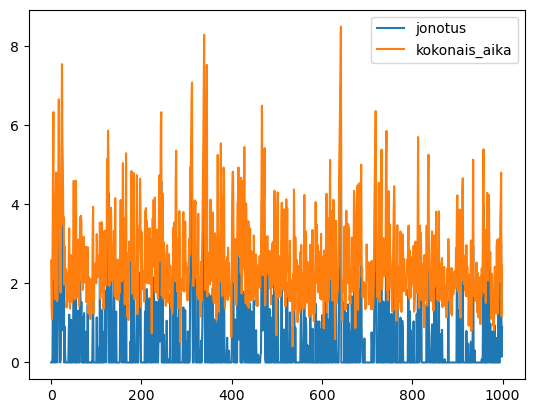

In [6]:
#Tästä näkee nousevana trendinä, jos jono kasvaa ajan kuluessa
simulointi[['jonotus', 'kokonais_aika']].plot()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

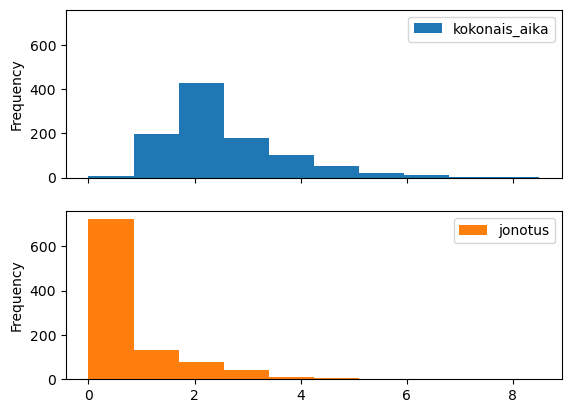

In [7]:
simulointi[['kokonais_aika', 'jonotus']].plot.hist(subplots=True, sharex=True, sharey=True)

Lisätietoa satunnaislukujen tuottamisesta: https://numpy.org/doc/stable/reference/random/index.html